In [63]:
from google.colab import drive
import os


drive.mount('/content/drive')

mfcc_data_folder = '/content/drive/My Drive/SHAZAM-CAPSTONE-main/SHAZAM-CAPSTONE-main/ml_processed_data'
hist_data_folder = '/content/drive/My Drive/SHAZAM-CAPSTONE-main/SHAZAM-CAPSTONE-main/hist_data'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This loads the csv files, skips the first row and column of labels, and pads the histogram array to match up with the mfcc array.

Expected data shapes:
X shape: (20, 550, 14)
y shape: (20, 550, 1)

In [69]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

def load_data(directory):
    data = []
    for file_name in sorted(os.listdir(directory)):
        if file_name.endswith('.csv'):
            file_path = os.path.join(directory, file_name)
            df = pd.read_csv(file_path, header=None,skiprows=1)
            data.append(df.iloc[:, 1:].values)  # Using .iloc to exclude the time bin column
    max_length = max(array.shape[0] for array in data)
    padded_data = pad_sequences(data, maxlen=max_length, padding='post', dtype='float32')
    return np.array(padded_data)

# Load the MFCC and histogram data
X = load_data(mfcc_data_folder)  # Shape: (num_samples, time_steps, n_features)
y = load_data(hist_data_folder)  # Shape: (num_samples, time_steps)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")



X shape: (20, 550, 14)
y shape: (20, 550, 1)


My first attempt at LOO (Leave One Out) Cross Validation modeling.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5980583.5000 - mse: 5980583.5000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - loss: 2880233.7500 - mse: 2880233.7500
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step - loss: 1459159.6250 - mse: 1459159.6250
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step - loss: 1607477.2500 - mse: 1607477.2500
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step - loss: 1362553.8750 - mse: 1362553.8750
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - loss: 978535.6875 - mse: 978535.6875
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - loss: 854991.1875 - mse: 854991.1875
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - loss: 946118.3125 - mse: 946118.3125
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - loss: 1041006.9375 - mse: 1041006.9375
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - loss: 1018155.1875 - mse: 1018155.1875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 469991.5625 - mse: 469991.5625
Test MSE for this fo

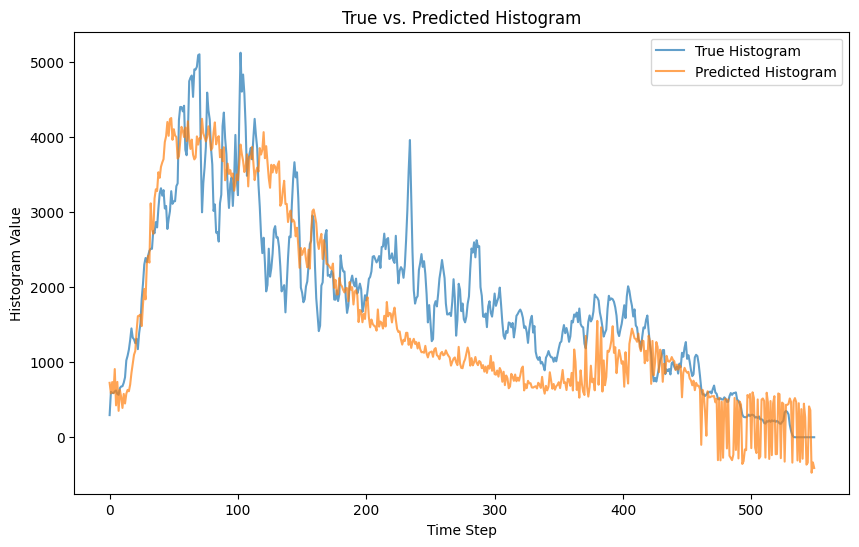

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5902659.0000 - mse: 5902659.0000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - loss: 2754354.0000 - mse: 2754354.0000
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - loss: 1449742.5000 - mse: 1449742.5000
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - loss: 1550077.0000 - mse: 1550077.0000
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - loss: 1378273.8750 - mse: 1378273.8750
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - loss: 1034927.8125 - mse: 1034927.8125
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - loss: 871607.1875 - mse: 871607.1875
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 910020.4375 - mse: 910020.4375
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 990745.2500 - mse: 990745.2500
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 986927.8750 - mse: 986927.8750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 544432.3750 - mse: 544432.3750
Test MSE for this fold

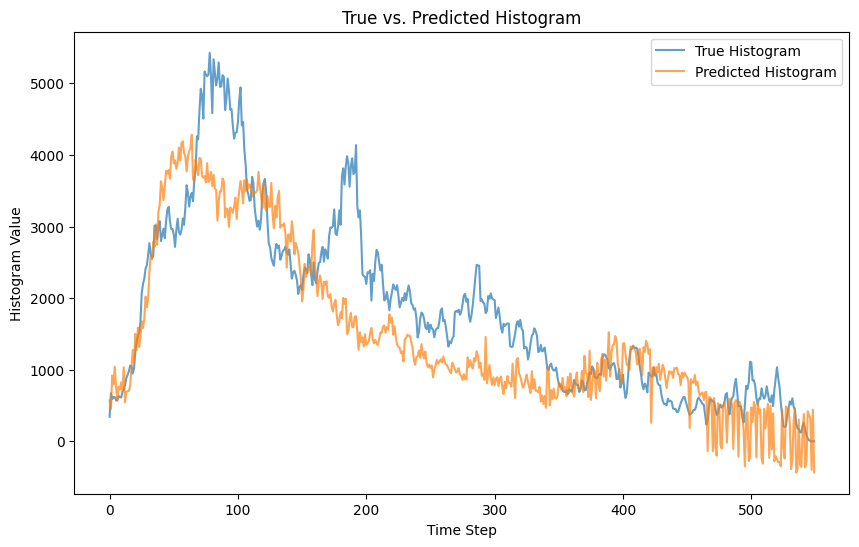

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5918643.5000 - mse: 5918643.5000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - loss: 3179329.0000 - mse: 3179329.0000
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - loss: 1557780.7500 - mse: 1557780.7500
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 1511768.2500 - mse: 1511768.2500
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - loss: 1486675.3750 - mse: 1486675.3750
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - loss: 1156339.7500 - mse: 1156339.7500
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 901966.0000 - mse: 901966.0000
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - loss: 825281.3750 - mse: 825281.3750
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step - loss: 860138.6875 - mse: 860138.6875
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - loss: 914066.8125 - mse: 914066.8125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - loss: 1386480.5000 - mse: 1386480.5000
Test MSE for this fo

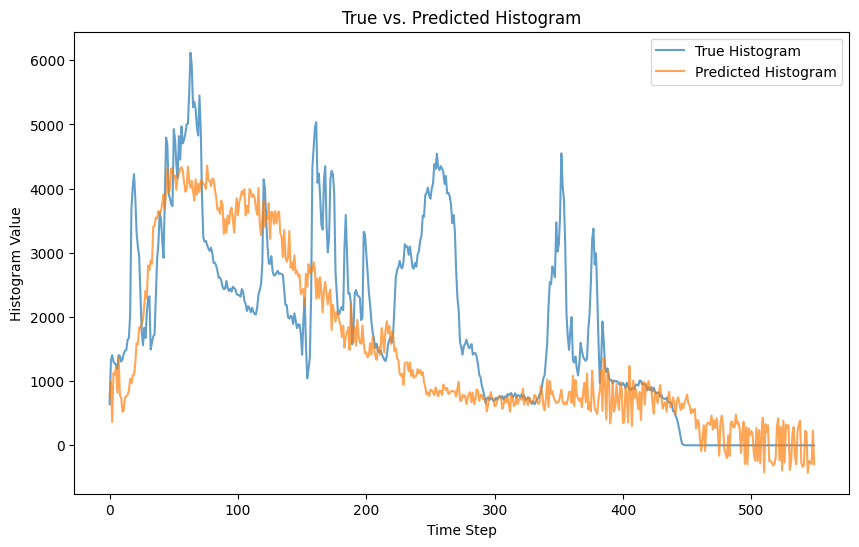

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5822904.5000 - mse: 5822904.5000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 3367615.2500 - mse: 3367615.2500
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 1699573.2500 - mse: 1699573.2500
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - loss: 1364612.7500 - mse: 1364612.7500
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - loss: 1492940.3750 - mse: 1492940.3750
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - loss: 1262335.7500 - mse: 1262335.7500
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - loss: 984507.8125 - mse: 984507.8125
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - loss: 842772.8125 - mse: 842772.8125
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - loss: 830154.0000 - mse: 830154.0000
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - loss: 882263.6250 - mse: 882263.6250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 1245454.5000 - mse: 1245454.5000
Test MSE for this fo

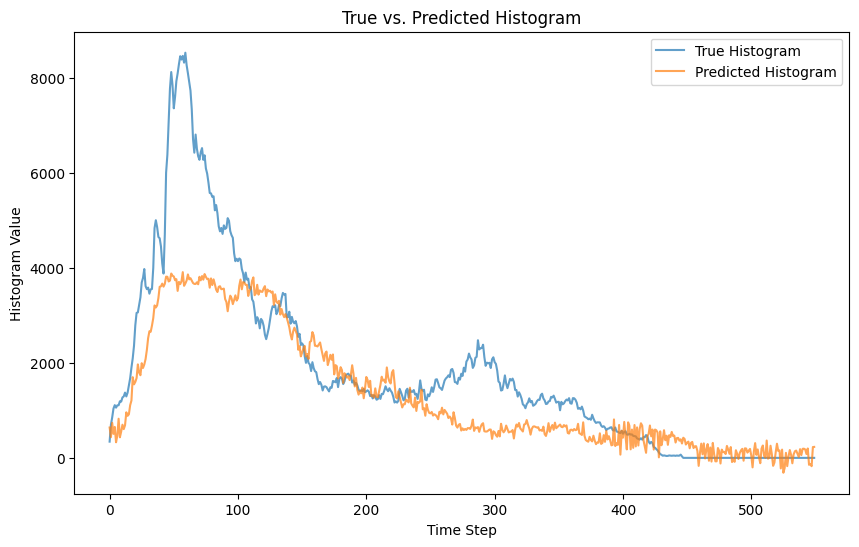

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 5980882.0000 - mse: 5980882.0000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 2769420.0000 - mse: 2769420.0000
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - loss: 1460351.0000 - mse: 1460351.0000
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - loss: 1546694.8750 - mse: 1546694.8750
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - loss: 1337919.1250 - mse: 1337919.1250
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - loss: 991888.4375 - mse: 991888.4375
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - loss: 864337.8125 - mse: 864337.8125
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - loss: 924445.3750 - mse: 924445.3750
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 994017.2500 - mse: 994017.2500
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - loss: 976186.0000 - mse: 976186.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 374991.3125 - mse: 374991.3125
Test MSE for this fold: 

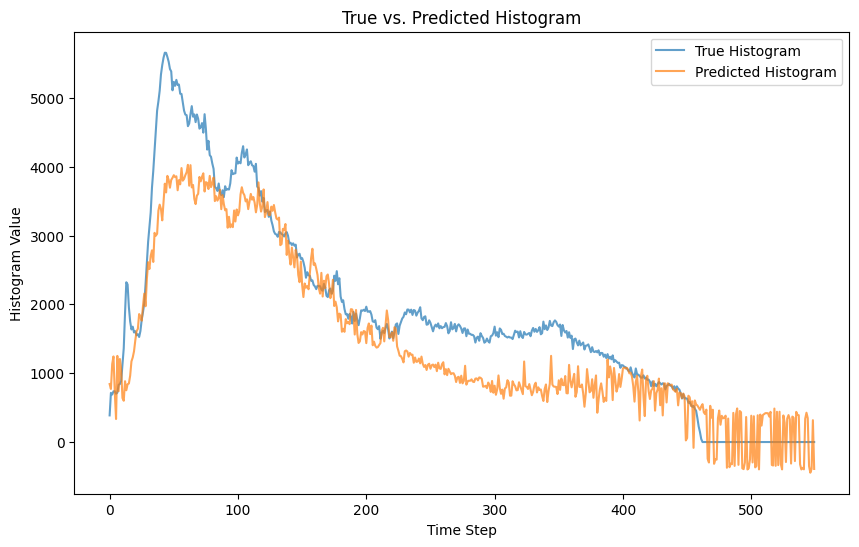

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5859657.5000 - mse: 5859657.5000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - loss: 3192940.5000 - mse: 3192940.5000
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step - loss: 1577703.5000 - mse: 1577703.5000
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step - loss: 1492003.2500 - mse: 1492003.2500
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step - loss: 1519728.0000 - mse: 1519728.0000
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - loss: 1223585.6250 - mse: 1223585.6250
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - loss: 974432.4375 - mse: 974432.4375
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - loss: 889910.7500 - mse: 889910.7500
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - loss: 916989.5000 - mse: 916989.5000
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 977222.6250 - mse: 977222.6250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 842736.6875 - mse: 842736.6875
Test MSE for this fold

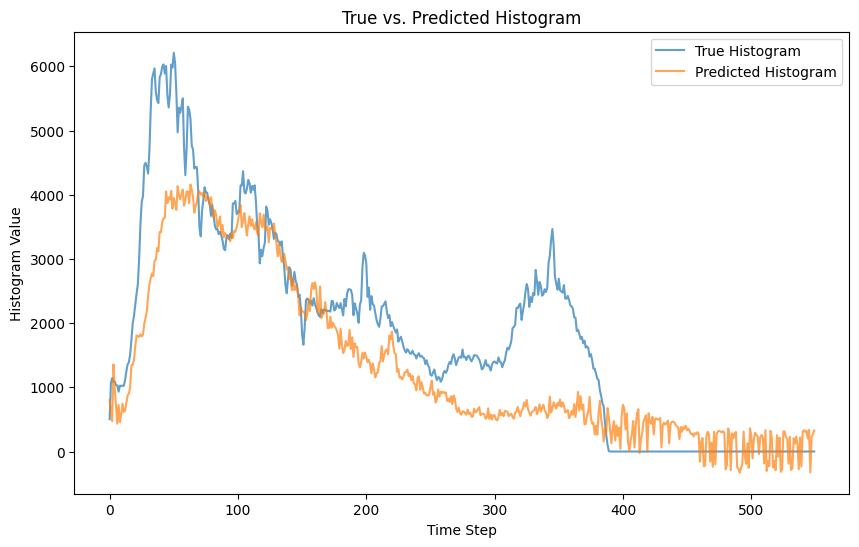

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5917078.5000 - mse: 5917078.5000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - loss: 2657087.0000 - mse: 2657087.0000
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - loss: 1457515.0000 - mse: 1457515.0000
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - loss: 1538514.6250 - mse: 1538514.6250
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - loss: 1412480.0000 - mse: 1412480.0000
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - loss: 1093537.7500 - mse: 1093537.7500
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - loss: 901137.5000 - mse: 901137.5000
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - loss: 891167.3750 - mse: 891167.3750
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 958954.6250 - mse: 958954.6250
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - loss: 988883.0625 - mse: 988883.0625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 484637.5000 - mse: 484637.5000
Test MSE for this fold

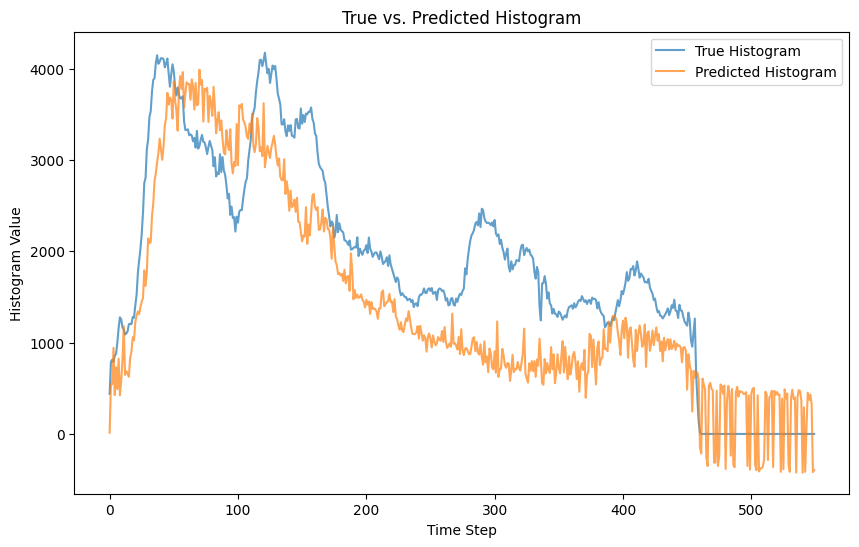

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5779582.5000 - mse: 5779582.5000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - loss: 2974803.2500 - mse: 2974803.2500
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - loss: 1434523.5000 - mse: 1434523.5000
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - loss: 1475792.5000 - mse: 1475792.5000
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 1441541.0000 - mse: 1441541.0000
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - loss: 1119201.0000 - mse: 1119201.0000
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 880707.3750 - mse: 880707.3750
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - loss: 818810.0000 - mse: 818810.0000
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step - loss: 867157.8125 - mse: 867157.8125
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - loss: 931180.0000 - mse: 931180.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - loss: 2786226.0000 - mse: 2786226.0000
Test MSE for this fo

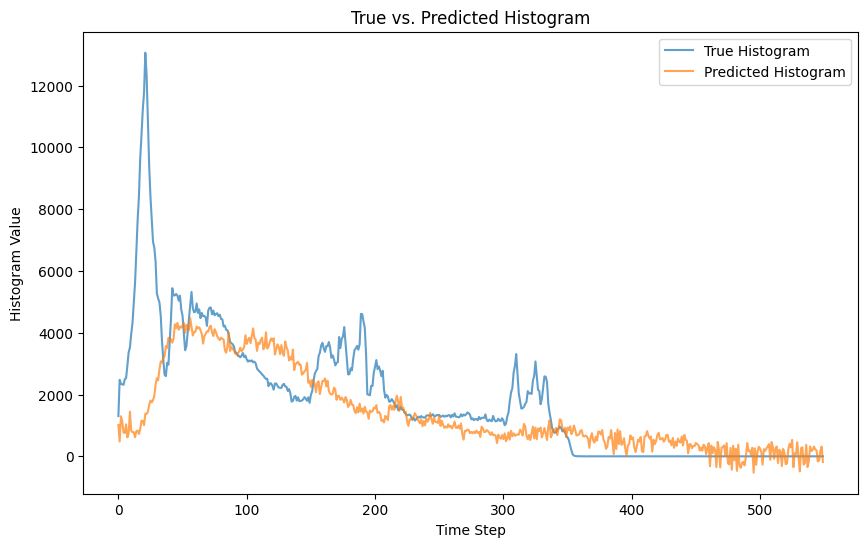

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5898282.5000 - mse: 5898282.5000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - loss: 2949457.2500 - mse: 2949457.2500
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - loss: 1465903.0000 - mse: 1465903.0000
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - loss: 1606335.0000 - mse: 1606335.0000
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - loss: 1506261.7500 - mse: 1506261.7500
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 1158023.7500 - mse: 1158023.7500
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - loss: 932315.5000 - mse: 932315.5000
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - loss: 890047.5625 - mse: 890047.5625
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - loss: 945085.1875 - mse: 945085.1875
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - loss: 991568.6250 - mse: 991568.6250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 618859.8750 - mse: 618859.8750
Test MSE for this fold

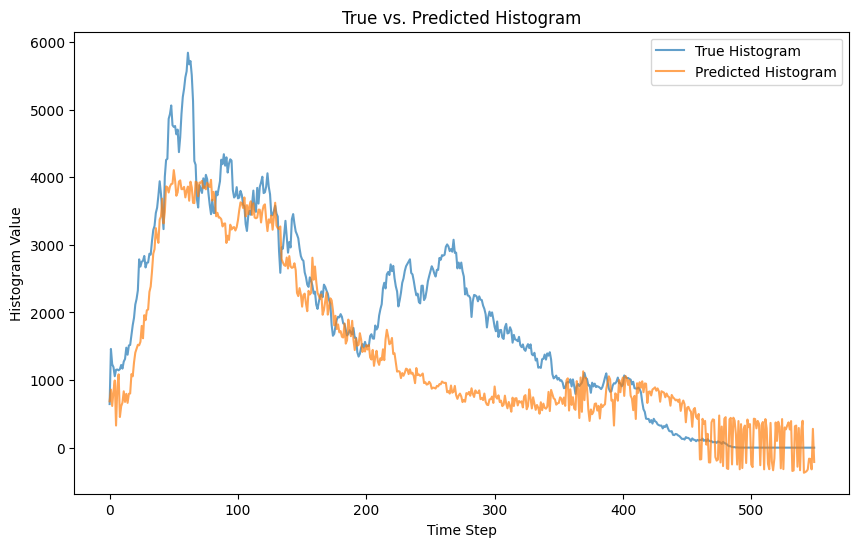

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5702487.5000 - mse: 5702487.5000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - loss: 2676414.2500 - mse: 2676414.2500
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - loss: 1301485.0000 - mse: 1301485.0000
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - loss: 1487168.8750 - mse: 1487168.8750
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - loss: 1333050.7500 - mse: 1333050.7500
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 966907.8125 - mse: 966907.8125
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - loss: 770200.6250 - mse: 770200.6250
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - loss: 779143.1875 - mse: 779143.1875
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - loss: 866460.5000 - mse: 866460.5000
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - loss: 904795.6875 - mse: 904795.6875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 2825814.2500 - mse: 2825814.2500
Test MSE for this fold

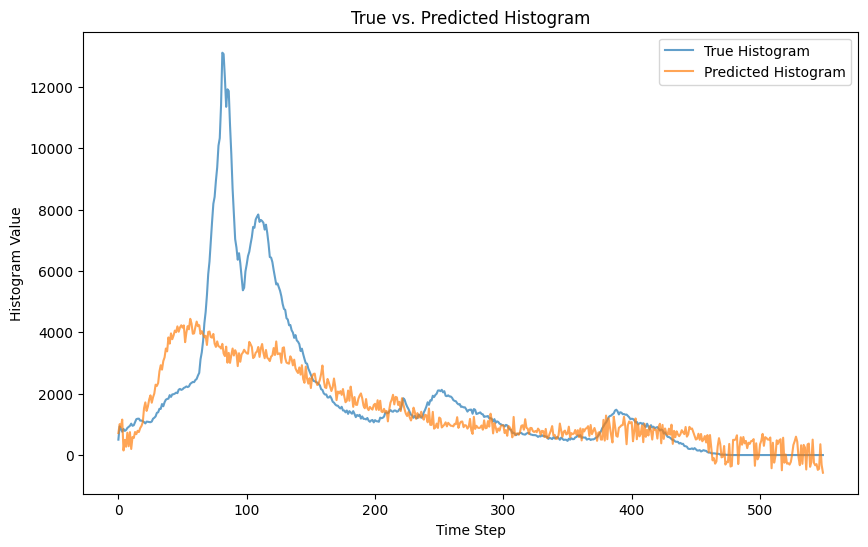

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5880481.5000 - mse: 5880481.5000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step - loss: 2803443.2500 - mse: 2803443.2500
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - loss: 1407979.6250 - mse: 1407979.6250
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step - loss: 1553839.0000 - mse: 1553839.0000
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step - loss: 1459211.3750 - mse: 1459211.3750
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - loss: 1113802.0000 - mse: 1113802.0000
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - loss: 886670.3125 - mse: 886670.3125
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - loss: 859336.1875 - mse: 859336.1875
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step - loss: 927425.5625 - mse: 927425.5625
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - loss: 968300.5000 - mse: 968300.5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 1607672.6250 - mse: 1607672.6250
Test MSE for this fo

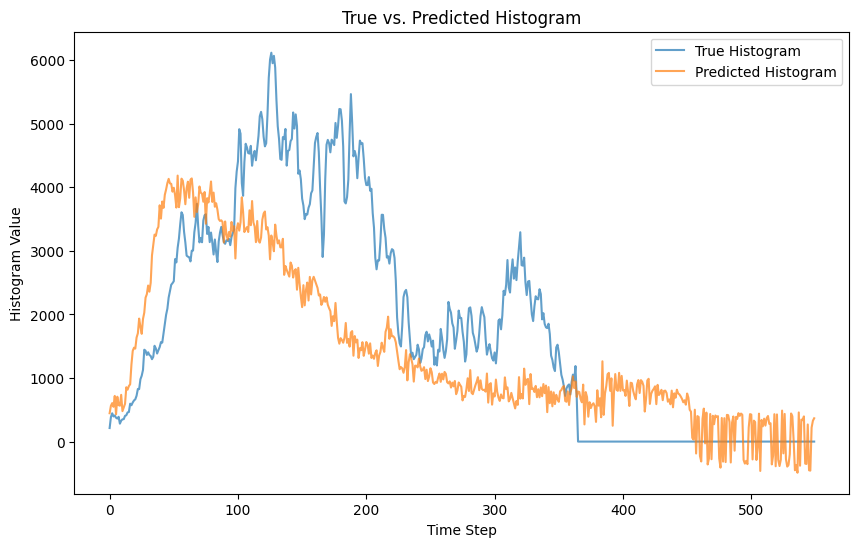

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5786910.5000 - mse: 5786910.5000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 2783644.5000 - mse: 2783644.5000
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 1425032.3750 - mse: 1425032.3750
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - loss: 1597323.6250 - mse: 1597323.6250
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - loss: 1400538.6250 - mse: 1400538.6250
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - loss: 1028290.1875 - mse: 1028290.1875
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - loss: 866633.8125 - mse: 866633.8125
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 911169.5000 - mse: 911169.5000
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - loss: 1004564.1875 - mse: 1004564.1875
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - loss: 1025010.7500 - mse: 1025010.7500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 771187.2500 - mse: 771187.2500
Test MSE for this 

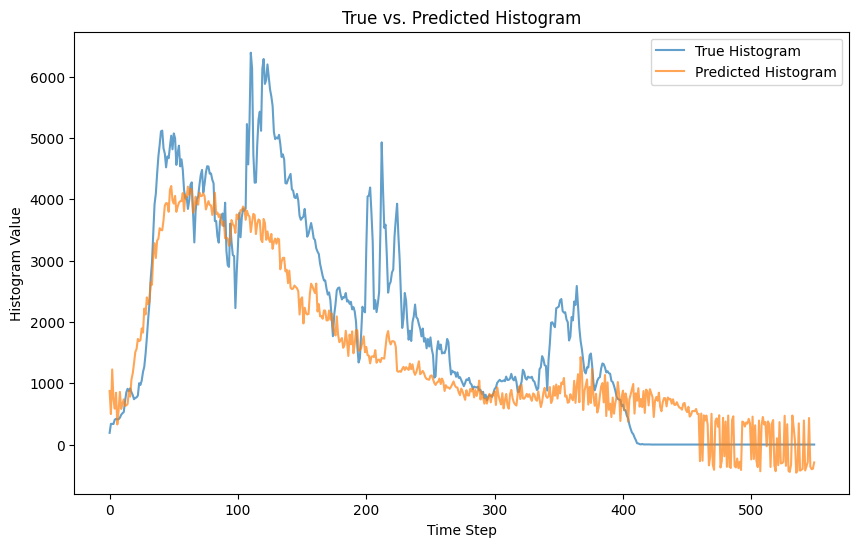

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5974979.5000 - mse: 5974979.5000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - loss: 3110961.7500 - mse: 3110961.7500
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - loss: 1509932.3750 - mse: 1509932.3750
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 1672940.7500 - mse: 1672940.7500
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 1511696.8750 - mse: 1511696.8750
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - loss: 1076958.1250 - mse: 1076958.1250
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 860773.3750 - mse: 860773.3750
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - loss: 880712.6250 - mse: 880712.6250
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 971889.6875 - mse: 971889.6875
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - loss: 1007717.6875 - mse: 1007717.6875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 608534.6875 - mse: 608534.6875
Test MSE for this fo

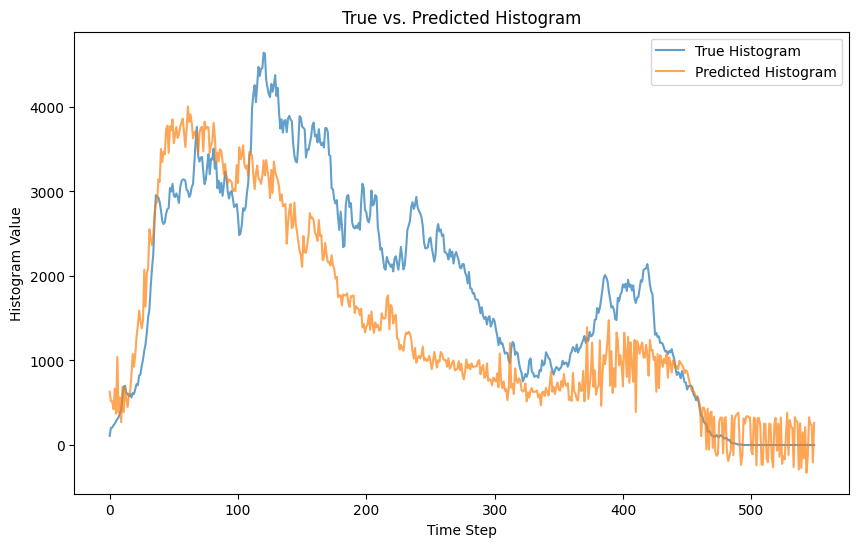

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5983506.5000 - mse: 5983506.5000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step - loss: 2631127.7500 - mse: 2631127.7500
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - loss: 1478157.8750 - mse: 1478157.8750
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - loss: 1435965.8750 - mse: 1435965.8750
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - loss: 1215846.0000 - mse: 1215846.0000
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - loss: 920173.3750 - mse: 920173.3750
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - loss: 843478.4375 - mse: 843478.4375
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - loss: 921656.0000 - mse: 921656.0000
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - loss: 954673.2500 - mse: 954673.2500
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - loss: 885803.3750 - mse: 885803.3750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 1427233.0000 - mse: 1427233.0000
Test MSE for this fold

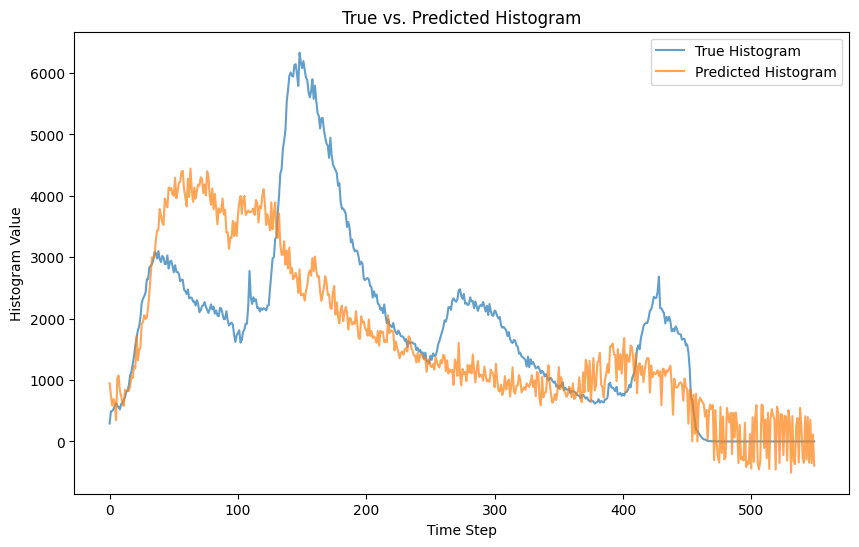

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5868570.0000 - mse: 5868570.0000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - loss: 2916981.5000 - mse: 2916981.5000
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 1429490.7500 - mse: 1429490.7500
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 1634326.7500 - mse: 1634326.7500
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - loss: 1488285.1250 - mse: 1488285.1250
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 1079470.6250 - mse: 1079470.6250
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - loss: 857935.0625 - mse: 857935.0625
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 866001.8125 - mse: 866001.8125
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 959470.1875 - mse: 959470.1875
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - loss: 1008195.1875 - mse: 1008195.1875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 1178237.0000 - mse: 1178237.0000
Test MSE for this 

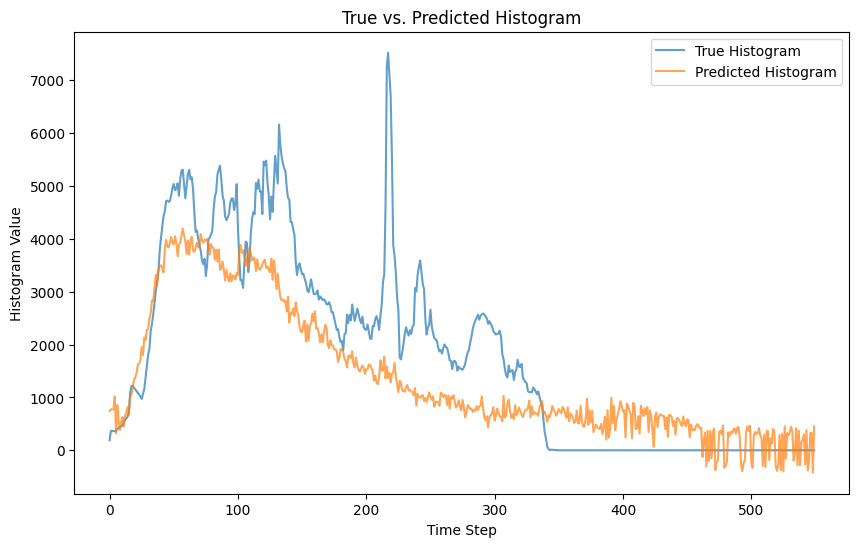

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5883524.0000 - mse: 5883524.0000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - loss: 2791240.0000 - mse: 2791240.0000
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - loss: 1418315.2500 - mse: 1418315.2500
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - loss: 1588848.3750 - mse: 1588848.3750
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - loss: 1460996.5000 - mse: 1460996.5000
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - loss: 1111657.6250 - mse: 1111657.6250
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - loss: 900420.6250 - mse: 900420.6250
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - loss: 875208.6250 - mse: 875208.6250
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - loss: 936275.3750 - mse: 936275.3750
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - loss: 975945.1875 - mse: 975945.1875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - loss: 776687.8750 - mse: 776687.8750
Test MSE for this fold

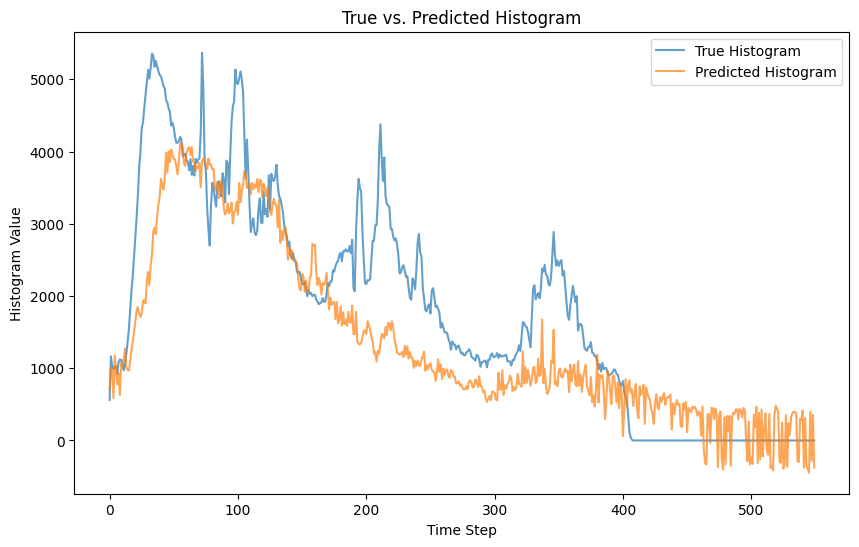

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5945787.5000 - mse: 5945787.5000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - loss: 3064384.7500 - mse: 3064384.7500
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 1489031.2500 - mse: 1489031.2500
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 1678049.8750 - mse: 1678049.8750
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - loss: 1491520.0000 - mse: 1491520.0000
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - loss: 1073322.6250 - mse: 1073322.6250
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 871056.1250 - mse: 871056.1250
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - loss: 908105.5000 - mse: 908105.5000
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - loss: 1014367.0625 - mse: 1014367.0625
Epoch 10/10


In [ ]:
import matplotlib.pyplot as plt

# LOO Leave One Out
loo = LeaveOneOut()


for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(550, 14)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(550, activation='linear')) #550 since we have 550 time steps
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

    # Evaluate the model
    loss, mse = model.evaluate(X_test, y_test)
    print(f"Test MSE for this fold: {mse}")

    # Make prediction
    y_pred = model.predict(X_test).flatten()


    # Plot the true vs. predicted histograms
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.flatten(), label='True Histogram', alpha=0.7)
    plt.plot(y_pred, label='Predicted Histogram', alpha=0.7)
    plt.xlabel('Time Step')
    plt.ylabel('Histogram Value')
    plt.title('True vs. Predicted Histogram')
    plt.legend()
    plt.show()

